# Medical Chatbot - Meddy
## Project for course Intelligent Systems at Faculty of Organization and Informatics Varaždin, University of Zagreb

(c) 2021 Alagić Aldin, Benkus Maja, Košmerl Igor, Krištofić Miro 

## Natural Language Processing (NLP)

- this part of the notebook depicts the data preparation, but also the training of the NLP model, as well as the neural network validation 
- the data for the NLP model is loaded from the _intents_short.json_ file

In [2]:
import json

with open('intents_short.json', 'r') as f:
    intents = json.load(f)
    
    
intents

{'intents': [{'tag': 'abdominal_pain',
   'patterns': ['abdominal pain',
    'abdomen hurts',
    'pain in stomach',
    'pain in abdomen']},
  {'tag': 'abnormal_menstruation',
   'patterns': ['abnormal menstruation',
    'heavy period',
    'Heavy flow',
    'Period lasts longer',
    'period painful',
    'strong menstrual pain',
    'Menstrual cramps strong']},
  {'tag': 'acidity',
   'patterns': ['acid reflux', 'acidity problems', 'heartburn']},
  {'tag': 'acute_liver_failure',
   'patterns': ['acute liver failure',
    'liver hurts',
    'pain around liver',
    'Upper right abdomen hurts']},
  {'tag': 'altered_sensorium',
   'patterns': ['altered sensorium',
    "can't think clearly",
    'hard to think',
    'unable to concentrate']},
  {'tag': 'anxiety',
   'patterns': ['anxiety', 'anxious', 'really worried', 'nervous']},
  {'tag': 'back_pain',
   'patterns': ['back hurts', 'back pain', 'pain in back']},
  {'tag': 'belly_pain',
   'patterns': ['belly hurts',
    'belly pain',
 

In [3]:
all_words = []
tags = []
xy = []

In [4]:
import nltk

for intent in intents['intents']:
    tag = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        all_words.extend(w)
        xy.append( (w, tag) )

In [5]:
xy

[(['abdominal', 'pain'], 'abdominal_pain'),
 (['abdomen', 'hurts'], 'abdominal_pain'),
 (['pain', 'in', 'stomach'], 'abdominal_pain'),
 (['pain', 'in', 'abdomen'], 'abdominal_pain'),
 (['abnormal', 'menstruation'], 'abnormal_menstruation'),
 (['heavy', 'period'], 'abnormal_menstruation'),
 (['Heavy', 'flow'], 'abnormal_menstruation'),
 (['Period', 'lasts', 'longer'], 'abnormal_menstruation'),
 (['period', 'painful'], 'abnormal_menstruation'),
 (['strong', 'menstrual', 'pain'], 'abnormal_menstruation'),
 (['Menstrual', 'cramps', 'strong'], 'abnormal_menstruation'),
 (['acid', 'reflux'], 'acidity'),
 (['acidity', 'problems'], 'acidity'),
 (['heartburn'], 'acidity'),
 (['acute', 'liver', 'failure'], 'acute_liver_failure'),
 (['liver', 'hurts'], 'acute_liver_failure'),
 (['pain', 'around', 'liver'], 'acute_liver_failure'),
 (['Upper', 'right', 'abdomen', 'hurts'], 'acute_liver_failure'),
 (['altered', 'sensorium'], 'altered_sensorium'),
 (['ca', "n't", 'think', 'clearly'], 'altered_sensori

In [6]:
# synthetic dataset created for neural network validation
xy_test = [
    (['ca', "n't", 'think', 'straight'], 'altered_sensorium'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['bloody', 'poop'], 'bloody_stool'),
    (['blurred', 'vision'], 'blurred_and_distorted_vision'),
    (['ca', "n't", 'breathe'], 'breathlessness'),
    (['Yellow', 'liquid', 'pimple'], 'yellow_crust_ooze'),
    (['lost', 'weight'], 'weight_loss'),
    (['side', 'weaker'], 'weakness_of_one_body_side'),
    (['watering', 'eyes'], 'watering_from_eyes'),
    (['brief', 'blindness'], 'visual_disturbances'),
    (['throat', 'hurts'], 'throat_irritation'),
    (['extremities', 'swelling'], 'swollen_extremeties'),
    (['swollen', 'lymph', 'nodes'], 'swelled_lymph_nodes'),
    (['dark', 'under', 'eyes'], 'sunken_eyes'),
    (['stomach', 'blood'], 'stomach_bleeding'),
    (['blood', 'urine'], 'spotting_urination'),
    (['sinuses', 'hurt'], 'sinus_pressure'),
    (['watery', 'from', 'nose'], 'runny_nose'),
    (['have', 'to', 'move'], 'restlessness'),
    (['red', 'patches', 'body'], 'red_spots_over_body'),
    (['sneeze'], 'continuous_sneezing'),
    (['coughing'], 'cough'),
    (['skin', 'patches'], 'dischromic_patches'),
    (['skin', 'bruised'], 'bruising'),
    (['burning', 'pee'], 'burning_micturition'),
    (['hurts', 'pee'], 'burning_micturition'),
    (['Burning', 'sensation'], 'burning_micturition'),
    (['chest', 'pressure'], 'chest_pain'),
    (['pain', 'butt'], 'pain_in_anal_region'),
    (['heart', 'bad', 'beat'], 'palpitations'),
    (['fart', 'lot'], 'passage_of_gases'),
    (['cough', 'phlegm'], 'phlegm'),
    (['lot', 'urine'], 'polyuria'),
    (['Veins', 'bigger'], 'prominent_veins_on_calf'),
    (['Veins', 'emphasized'], 'prominent_veins_on_calf'),
    (['yellow', 'pimples'], 'pus_filled_pimples'),
    (['red', 'nose'], 'red_sore_around_nose'),
    (['skin', 'yellow'], 'yellowish_skin'),
    (['eyes', 'yellow'], 'yellowing_of_eyes'),
    (['large', 'thyroid'], 'enlarged_thyroid'),
    (['really', 'hunger'], 'excessive_hunger'),
    (['always', 'hungry'], 'excessive_hunger'),
]

In [7]:
len(xy_test)

43

In [8]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

ignore_words = ['?', '!', '.', ',']
all_words = [stemmer.stem(w.lower()) for w in all_words if w not in ignore_words]
all_words = sorted(set(all_words))
all_words

['a',
 'abdomen',
 'abdomin',
 'abnorm',
 'ach',
 'acid',
 'acn',
 'acut',
 'affair',
 'alcohol',
 'all',
 'also',
 'alter',
 'alway',
 'am',
 'anal',
 'and',
 'ankl',
 'annoy',
 'anu',
 'anxieti',
 'anxiou',
 'anyth',
 'appetit',
 'are',
 'arm',
 'around',
 'at',
 'atrophi',
 'attack',
 'back',
 'bad',
 'bag',
 'balanc',
 'beat',
 'befor',
 'behind',
 'belli',
 'between',
 'bigger',
 'blackhead',
 'bladder',
 'bleed',
 'blind',
 'blister',
 'bloat',
 'blood',
 'bloodi',
 'blue',
 'blur',
 'blurri',
 'bodi',
 'breath',
 'breathless',
 'brief',
 'bright',
 'brittl',
 'broken',
 'brown',
 'bruis',
 'bump',
 'burn',
 'burp',
 'butt',
 'ca',
 'calm',
 'caugh',
 'chang',
 'chest',
 'chill',
 'circl',
 'clearli',
 'cold',
 'color',
 'coma',
 'comfort',
 'concentr',
 'congest',
 'constantli',
 'constip',
 'consumpt',
 'contact',
 'continu',
 'cough',
 'cramp',
 'crust',
 'dark',
 'darker',
 'deep',
 'dehydr',
 'dent',
 'depress',
 'diarrhoea',
 'differ',
 'difficulti',
 'dischrom',
 'discomfo

In [9]:
tags = sorted(set(tags))
tags

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar

- for better understanding, an example is given:
     - set of all words is defined as (i, you, he, she, we, they)
     - the sentence is given: "I am pondering while they are sleeping"
     - from that sencence, a bag of words in generated: (1, 0, 0, 0, 0, 1)
         - in that sentence, there are two words from the set of all words - _i_ and _they_
         - a 1 is put in the place of those words in the set of all words and a 0 everywhere else
- in case of the _bag\_of\_words_ method, a bag is initially filled with zeros (the length of the bag is always equal to the length of the set of all words)
- in the initialized bag of words, the 1's are placeon the indexes of those the words from set of all words that appear in the given sentence 

```python
import numpy as np
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def bag_of_words(tokenized_sentence, all_words):
    tokenized_sentence = [stemmer.stem(w.lower()) for w in tokenized_sentence]
    
    bag = np.zeros(len(all_words), dtype=np.float32)
    for idx, w in enumerate(all_words):
        if w in tokenized_sentence:
            bag[idx] = 1.0
    
    return bag
```

In [10]:
#Example of method bag_of_words

import numpy as np
from nltk_utils import bag_of_words

sentence = ['hello', 'how', 'are', 'you']
words = ['hi', 'hello', 'I', 'you', 'bye', 'thanks', 'cool']
bag_of_words(sentence, words)

array([0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
X_train = []
y_train = []

for (pattern, tag) in xy:
    bag = bag_of_words(pattern, all_words)
    X_train.append(bag)
    
    label = tags.index(tag)
    y_train.append(label) 
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train

array([  0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   3,   3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,
         6,   6,   6,   7,   7,   7,   7,   7,   8,   8,   8,   8,   9,
         9,   9,   9,  10,  10,  10,  10,  11,  11,  11,  12,  12,  12,
        13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,  15,  15,
        15,  16,  16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  19,
        19,  20,  20,  20,  20,  20,  21,  21,  21,  23,  23,  23,  23,
        24,  24,  24,  24,  25,  25,  25,  25,  25,  26,  26,  26,  26,
        26,  22,  22,  22,  22,  22,  27,  27,  28,  28,  28,  29,  29,
        30,  30,  30,  31,  31,  31,  31,  32,  32,  32,  32,  33,  33,
        33,  33,  34,  34,  34,  34,  34,  34,  35,  35,  35,  35,  35,
        36,  36,  37,  37,  37,  37,  38,  38,  38,  39,  39,  39,  39,
        39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,  42,  42,
        43,  43,  43,  43,  44,  44,  44,  44,  45,  45,  45,  4

In [14]:
X_test = []
y_test = []

for (pattern, tag) in xy_test:
    bag = bag_of_words(pattern, all_words)
    X_test.append(bag)
    
    label = tags.index(tag)
    y_test.append(label) 
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
y_test

array([  4,   5,   5,  12,  13,  14, 127, 126, 124, 122, 120, 116, 114,
       110, 108, 106, 104,  98,  93,  92,  90,  25,  26,  32,  16,  17,
        17,  17,  18,  77,  79,  80,  82,  83,  84,  84,  86,  89, 130,
       129,  36,  37,  37])

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
class ChatDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.n_samples = len(X_data)
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return  self.n_samples

```python
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU() 
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out
```

In [22]:

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from nnet import NeuralNet
import multiprocessing

# Ensure these variables are defined
# tags = ...
# all_words = ...
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

# Ensure the 'spawn' method is used for multiprocessing on Windows
if __name__ == '__main__':
    multiprocessing.set_start_method('spawn', force=True)

    batch_size = 8
    hidden_size = 8
    output_size = len(tags)
    input_size = len(all_words)
    learning_rates = [0.01, 0.05, 0.1, 0.15]
    num_epochs = 1000

    class ChatDataset(Dataset):
        def __init__(self, X_data, y_data):
            self.X_data = X_data
            self.y_data = y_data

        def __len__(self):
            return len(self.X_data)

        def __getitem__(self, idx):
            return self.X_data[idx], self.y_data[idx]

    def nn_validation():
        dataset_train = ChatDataset(X_train, y_train)
        # Set num_workers to 0 to avoid multiprocessing issues on Windows
        train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)

        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        loss_train = []
        loss_test = []

        for lr in learning_rates:
            model = NeuralNet(input_size, hidden_size, output_size).to(device)
            criterion = nn.CrossEntropyLoss()
            optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

            print(f"Learning rate: {lr}, Training...")

            for epoch in range(num_epochs):
                model.train()
                for words, labels in train_loader:
                    words, labels = words.to(device), labels.to(device, dtype=torch.long)  # Convert labels to Long

                    outputs = model(words)
                    loss = criterion(outputs, labels)

                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                if (epoch + 1) % (num_epochs // 2) == 0:
                    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

            print(f'Final loss for lr {lr}: {loss.item():.4f}')
            loss_train.append(loss.item())

            model.eval()
            y_predicted = []

            with torch.no_grad():
                for x in X_test:
                    x = torch.from_numpy(x).unsqueeze(0).to(device)
                    output = model(x)
                    _, predicted = torch.max(output, dim=1)
                    y_predicted.append(predicted.item())

            y_predicted = np.array(y_predicted)
            accuracy = accuracy_score(y_test, y_predicted)
            loss_test.append(accuracy)

            print(f"Accuracy for lr {lr}: {accuracy:.4f}")
            print()

        return loss_train, loss_test

    # Call the function to perform validation
    train_errors, test_errors = nn_validation()
    print("Training Losses:", train_errors)
    print("Test Accuracies:", test_errors)

Learning rate: 0.01, Training...
Epoch [500/1000], Loss: 1.6279
Epoch [1000/1000], Loss: 0.0210
Final loss for lr 0.01: 0.0210
Accuracy for lr 0.01: 0.5814

Learning rate: 0.05, Training...
Epoch [500/1000], Loss: 0.0088
Epoch [1000/1000], Loss: 0.0171
Final loss for lr 0.05: 0.0171
Accuracy for lr 0.05: 0.6744

Learning rate: 0.1, Training...
Epoch [500/1000], Loss: 0.0110
Epoch [1000/1000], Loss: 0.0035
Final loss for lr 0.1: 0.0035
Accuracy for lr 0.1: 0.6512

Learning rate: 0.15, Training...
Epoch [500/1000], Loss: 0.0066
Epoch [1000/1000], Loss: 0.5622
Final loss for lr 0.15: 0.5622
Accuracy for lr 0.15: 0.5814

Training Losses: [0.02097066305577755, 0.017139052972197533, 0.0035486421547830105, 0.562221884727478]
Test Accuracies: [0.5813953488372093, 0.6744186046511628, 0.6511627906976745, 0.5813953488372093]


In [23]:
train_errors, test_errors = nn_validation()

Learning rate: 0.01, Training...
Epoch [500/1000], Loss: 0.5418
Epoch [1000/1000], Loss: 0.0465
Final loss for lr 0.01: 0.0465
Accuracy for lr 0.01: 0.6279

Learning rate: 0.05, Training...
Epoch [500/1000], Loss: 0.0146
Epoch [1000/1000], Loss: 0.0304
Final loss for lr 0.05: 0.0304
Accuracy for lr 0.05: 0.7209

Learning rate: 0.1, Training...
Epoch [500/1000], Loss: 0.0143
Epoch [1000/1000], Loss: 0.0057
Final loss for lr 0.1: 0.0057
Accuracy for lr 0.1: 0.5581

Learning rate: 0.15, Training...
Epoch [500/1000], Loss: 0.0022
Epoch [1000/1000], Loss: 0.0074
Final loss for lr 0.15: 0.0074
Accuracy for lr 0.15: 0.6977



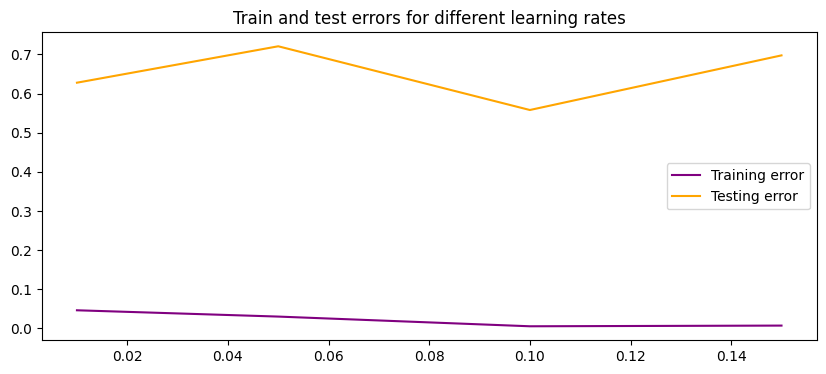

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))

plt.title("Train and test errors for different learning rates")
plt.plot(learning_rates, train_errors, c='purple', label='Training error')
plt.plot(learning_rates, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [27]:

import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from nnet import NeuralNet

# Ensure these variables are defined
# tags = ...
# all_words = ...
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

batch_size = 8
hidden_size = 8
output_size = len(tags)
input_size = len(all_words)
learning_rate = 0.01
num_epochs = 1000

class ChatDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __len__(self):
        return len(self.X_data)

    def __getitem__(self, idx):
        return self.X_data[idx], self.y_data[idx]

if __name__ == '__main__':
    # Ensure the 'spawn' method is used for multiprocessing on Windows
    import multiprocessing
    multiprocessing.set_start_method('spawn', force=True)

    dataset = ChatDataset(X_train, y_train)
    train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)  # Set num_workers to 0

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = NeuralNet(input_size, hidden_size, output_size).to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        for (words, labels) in train_loader:
            words = words.to(device)
            labels = labels.to(device, dtype=torch.long)  # Ensure labels are of type Long

            outputs = model(words)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if (epoch + 1) % (num_epochs // 10) == 0:
            print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

    print(f'final loss = {loss.item():.4f}')

epoch 100/1000, loss = 4.7626
epoch 200/1000, loss = 4.7784
epoch 300/1000, loss = 2.7732
epoch 400/1000, loss = 0.4534
epoch 500/1000, loss = 0.3915
epoch 600/1000, loss = 0.0795
epoch 700/1000, loss = 0.0312
epoch 800/1000, loss = 0.0397
epoch 900/1000, loss = 0.0343
epoch 1000/1000, loss = 0.0111
final loss = 0.0111


In [31]:
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "output_size": output_size,
    "hidden_size": hidden_size,
    "all_words": all_words,
    "tags": tags
}

FILE = "models/data1.pth"
torch.save(data, FILE)

### Symptom prediction

In [32]:
sentence = "My head hurts"
sentence = nltk.word_tokenize(sentence)
X = bag_of_words(sentence, all_words)
X = X.reshape(1, X.shape[0])
X = torch.from_numpy(X)

output = model(X)
_, predicted = torch.max(output, dim=1)
tag = tags[predicted.item()]

probs = torch.softmax(output, dim=1)
prob = probs[0][predicted.item()]

print("prob:", prob)

tag

prob: tensor(0.9812, grad_fn=<SelectBackward0>)


'headache'

## Transforming disease data

This part of the notebook shows the transformations over data related to diseases and symptoms. For each unique symptom, a new column was created in the dataframe. If symptom is typical for a paticular disease, then the column related to that symptom is set to 1, and otherwise to 0.

In [33]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("data/dataset.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [36]:
df = df.drop_duplicates()

In [37]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
symptoms = np.concatenate((df.Symptom_1.unique(), df.Symptom_2.unique(), df.Symptom_3.unique(), df.Symptom_4.unique(), 
                          df.Symptom_5.unique(), df.Symptom_6.unique(), df.Symptom_7.unique(), df.Symptom_8.unique(), 
                          df.Symptom_9.unique(), df.Symptom_10.unique(), df.Symptom_11.unique(), df.Symptom_12.unique(), 
                          df.Symptom_13.unique(), df.Symptom_14.unique(), df.Symptom_15.unique(), df.Symptom_16.unique(), 
                          df.Symptom_17.unique()))

In [39]:
symptoms_unique = list((set(symptoms)))

In [40]:
len(symptoms_unique)

132

In [41]:
i = 18
for each in symptoms_unique:
    df.insert(i, each, 0)
    i = i + 1

In [42]:
df = df.fillna(0)

In [43]:
for index, row in df.iterrows(): 
    disease_symptoms = [symptom for symptom in list(row)[1:] if symptom != 0]
    for each in disease_symptoms: 
        df.at[index, each] = 1

In [44]:
df = df.drop(columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
             'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16'
             , 'Symptom_17'])

In [45]:
df = df.loc[:, df.columns.notnull()]
df.columns = df.columns.str.replace(' ', '')
df = df.reindex(sorted(df.columns), axis=1)

In [46]:
list(df.columns)

['Disease',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irr

## Description, Precaution and Symptom Severity data

In [47]:
diseases_description = pd.read_csv("data/symptom_Description.csv")
diseases_description['Disease'] = diseases_description['Disease'].apply(lambda x: x.lower().strip(" "))

In [48]:
disease_precaution = pd.read_csv("data/symptom_precaution.csv")
disease_precaution['Disease'] = disease_precaution['Disease'].apply(lambda x: x.lower().strip(" "))

In [49]:
disease_precaution

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,drug reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,allergy,apply calamine,cover area with bandage,keep a diary,use ice to compress itching
3,hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,gerd,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis a,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) paroymsal positional vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [50]:
symptom_severity = pd.read_csv("data/Symptom-severity.csv")
symptom_severity = symptom_severity.applymap(lambda s: s.lower().strip(" ").replace(" ", "") if type(s) == str else s)

## Building the machine learning models

In [55]:
labels = df.to_numpy()[:, :1]
examples = df.to_numpy()[:, 1:]
list_of_symptoms = list(df.columns)[1:]

with open('data/list_of_symptoms.pickle1', 'wb') as data_file: 
    pickle.dump(list_of_symptoms, data_file)

print(len(labels))
print(len(examples))
print(len(list_of_symptoms))

304
304
131


In [56]:
#test example

symptoms = ['stomach_pain', 'headache'] 
x_test = []

with open('data/list_of_symptoms.pickle1', 'rb') as data_file:
    symptoms_list = pickle.load(data_file)

for each in symptoms_list: 
    if each in symptoms:
        x_test.append(1)
    else: 
        x_test.append(0)

x_test = np.asarray(x_test) 

In [57]:
#Cross validation function

def cross_validation(X_train, y_train, X_test, y_test, model_name, parameter_range=50): 
    train_errors = []
    test_errors = []
    
    parameters = np.linspace(1, parameter_range, parameter_range, dtype=int)
    
    for parameter in parameters: 
        if model_name == 'knn':            
            model = KNeighborsClassifier(n_neighbors=parameter, metric='cosine')
        elif model_name == 'logreg':
            model = LogisticRegression(solver='liblinear', C=1/(parameter*20))
        elif model_name == 'dctree':
            model = DecisionTreeClassifier(splitter='random', max_depth=parameter)
        elif model_name =='svm': 
            model = SVC(C=1/(parameter*10))
            
        model.fit(X_train, y_train)
        learning_error = 1 - model.score(X_train, y_train) 
        testing_error = 1 - model.score(X_test, y_test)
        train_errors.append(learning_error)
        test_errors.append(testing_error)
    
    if model_name == 'logreg':
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*20)
    elif model_name == 'svm': 
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*10)
    else: 
        best_parameter_value = parameters[np.argmin(test_errors)]
    
    return parameters, best_parameter_value, train_errors, test_errors

In [58]:
#kNN algorithm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, metric='cosine')
X_train, X_test, y_train, y_test = train_test_split(examples, labels.ravel(), test_size=0.2)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=6)

In [59]:
disease = knn.predict(x_test.reshape(1,-1))[0]
print(disease)

Paralysis (brain hemorrhage)


In [60]:
knn.score(X_test, y_test)

1.0

In [61]:
#Additional information about disease and precautions

description = diseases_description.loc[diseases_description['Disease'] == disease.strip(" ").lower(), 'Description'].iloc[0]
print(description)

precaution = disease_precaution[disease_precaution['Disease'] == disease.strip(" ").lower()]
sentence = 'Precautions: ' + precaution.Precaution_1.iloc[0] + ", " + precaution.Precaution_2.iloc[0] + ", " + precaution.Precaution_3.iloc[0] + ", " + precaution.Precaution_4.iloc[0]
print(sentence)

Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Precautions: massage, eat healthy, exercise, consult doctor


In [62]:
#Giving the advice about seeing the doctor if any of the symptoms has severity larger than 5 or if mean of all the symptoms is larger than 4

symptoms = ['stomach_pain', 'headache', 'coma'] 
severity = []

for each in symptoms: 
    severity.append(symptom_severity.loc[symptom_severity['Symptom'] == each.lower().strip(" ").replace(" ", ""), 'weight'].iloc[0])

if np.mean(severity) > 4 or np.max(severity) > 5:
    print("Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)")

Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)


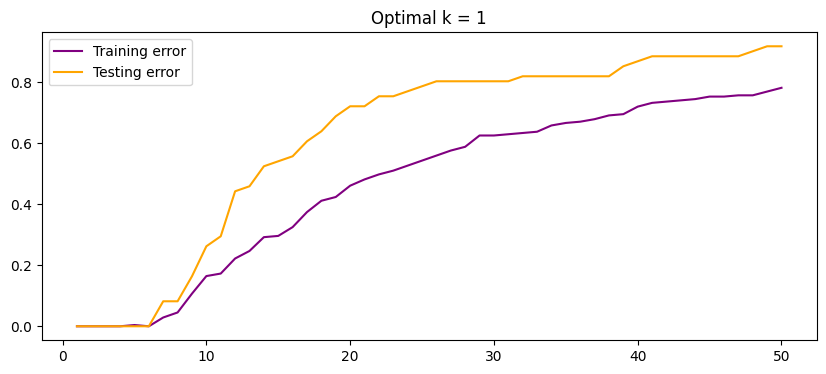

In [63]:
k_range = 20

fig = plt.figure(figsize=(10,4))


k, best_k, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='knn')
plt.title(f"Optimal k = {best_k}")
plt.plot(k, train_errors, c='purple', label='Training error')
plt.plot(k, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [64]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter='random', max_depth=100)

dc_tree = clf.fit(X_train, y_train)
dc_tree.predict(x_test.reshape(1,-1))

array(['Drug Reaction'], dtype=object)

In [65]:
dc_tree.score(X_test, y_test)

0.6557377049180327

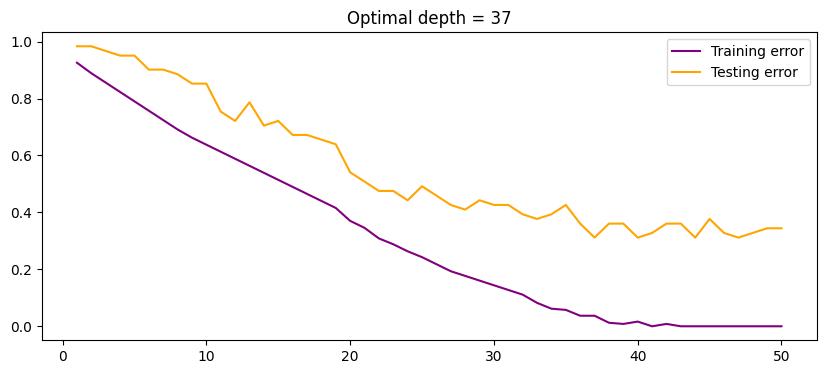

In [66]:
fig = plt.figure(figsize=(10,4))

depth, best_depth, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='dctree')
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depth, train_errors, c='purple', label='Training error')
plt.plot(depth, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [67]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=0.05)

logreg.fit(X_train, y_train)
logreg.predict(x_test.reshape(1,-1))

array(['Drug Reaction'], dtype=object)

In [68]:
print(logreg.score(X_test, y_test))

0.9016393442622951


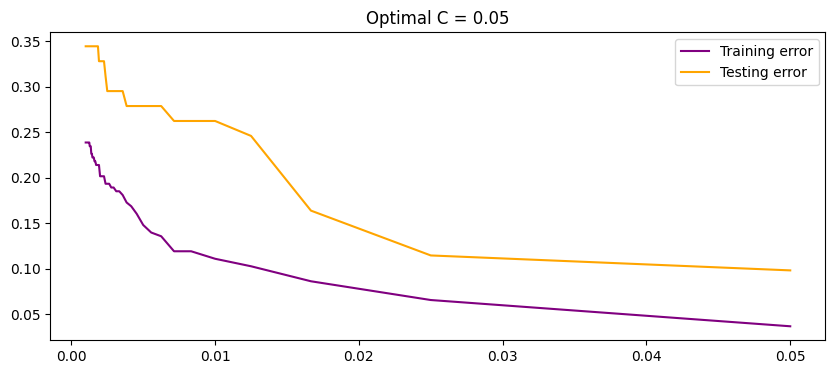

In [69]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='logreg')
c_reg = []
for each in c: 
    c_reg.append(1/(each*20))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [70]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(C=0.3)
svm.fit(X_train, y_train)
svm.predict(x_test.reshape(1,-1))

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [71]:
print(svm.score(X_test, y_test))

0.7377049180327869


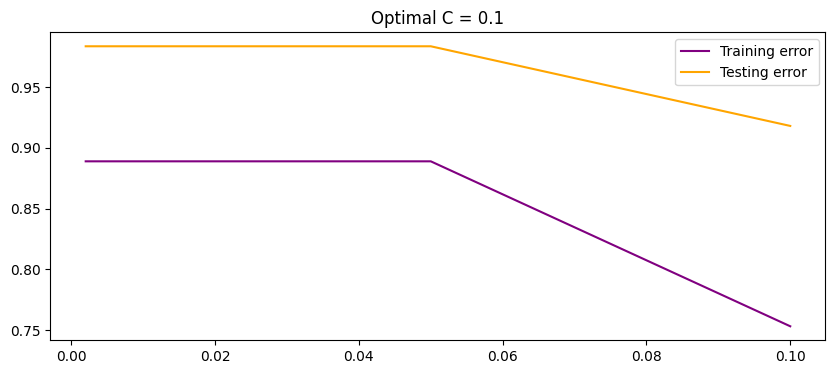

In [72]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='svm')
c_reg = []
for each in c: 
    c_reg.append(1/(each*10))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

## Ensemble learning

In [73]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression(solver='liblinear', C=0.03)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors=6, metric='cosine')))
    level0.append(('dctree', DecisionTreeClassifier(splitter='random', max_depth=34)))
    level0.append(('svm', SVC(C=0.1)))

    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return level0, model

c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

lr 1.0000 (0.0000)
cart 0.6085 (0.0414)


c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

ensemble 0.7873 (0.0459)


c:\Users\subho\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


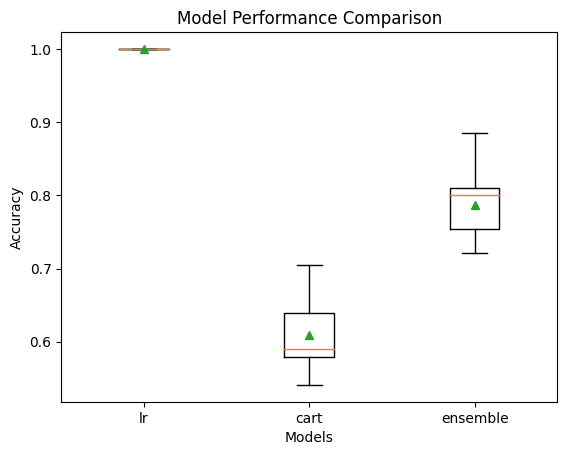

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# Example data (ensure this matches your actual data)
# examples, labels = ...

def get_stacking():
    level0 = [
        ('lr', LogisticRegression(max_iter=1000)),
        ('cart', DecisionTreeClassifier())
    ]
    level1 = LogisticRegression(max_iter=1000)
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return level0, model

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)  # Limiting n_jobs
    return scores

# Main script
if __name__ == '__main__':
    models, ensemble_model = get_stacking()
    results, names = [], []

    for name, model in models:
        scores = evaluate_model(model, examples, labels)
        results.append(scores)
        names.append(name)
        print(f'{name} {np.mean(scores):.4f} ({np.std(scores):.4f})')

    ensemble_scores = evaluate_model(ensemble_model, examples, labels)
    results.append(ensemble_scores)
    names.append('ensemble')
    print(f'ensemble {np.mean(ensemble_scores):.4f} ({np.std(ensemble_scores):.4f})')

    plt.boxplot(results, labels=names, showmeans=True)
    plt.title('Model Performance Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.show()


In [79]:
#Using pickle for dumping the model

model.fit(examples, labels.ravel())

with open('models/fitted_model1.pickle', 'wb') as modelFile:
    model_final = pickle.dump(model, modelFile)

with open('models/fitted_model.pickle', 'rb') as modelFile:
    model_final = pickle.load(modelFile)

predicted = model_final.predict(x_test.reshape(1, -1))[0]
print(f'Predicted Class: {predicted}')

Predicted Class: Hypertension 


##### Additional information

In [77]:
#Condition number of X_train 

print(np.linalg.cond(examples.astype(int)))

5.649171327591003e+19


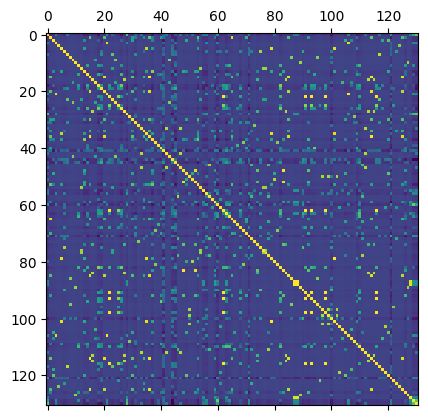

In [78]:
#Correlation matrix

plt.matshow(df.corr())
plt.show()